In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('/storage/gpfs_data/neutrino/users/gi/sand-reco/tests/python_tools')

In [2]:
from NLLtreeoutReader import Reader

In [3]:
from Helix import Helix
from EventDisplay import EventDisplay
import matplotlib.pyplot as plt
from dg_wire import dg_wire
from Circle import Circle
from Line2D import Line2D

In [4]:
from matplotlib.axes._axes import Axes

In [5]:
test_file = "/storage/gpfs_data/neutrino/users/gi/sand-reco/tests/test_reconstruct_NLLmethod_smear.root"
edep_file = '/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT-STUDY/geometry/production/events-in-SANDtracker.0.edep-sim.root'

In [6]:
reader = Reader(test_file, "tReco")

In [7]:
helix_true = reader.get_true_helix(9)
helix_reco = reader.get_reco_helix(9)

In [8]:
fitted_circle = Circle(reader.dataframe_fitted_values_zy['value'].values[0], 
                       reader.dataframe_fitted_values_zy['value'].values[1],
                       reader.dataframe_fitted_values_zy['value'].values[2])

fitted_line = Line2D.from_mq(reader.dataframe_fitted_values_xz['value'].values[0],
                             reader.dataframe_fitted_values_xz['value'].values[1])

In [9]:
initial_guess_circle = Circle(reader.dataframe_fitted_values_zy['initial_guess'].values[0], 
                               reader.dataframe_fitted_values_zy['initial_guess'].values[1],
                               reader.dataframe_fitted_values_zy['initial_guess'].values[2])
                               
initial_guess_line = Line2D.from_mq(reader.dataframe_fitted_values_xz['initial_guess'].values[0],
                             reader.dataframe_fitted_values_xz['initial_guess'].values[1])

In [10]:
initial_guess_line

In [11]:
wires = reader.get_wire_info(9)

In [12]:
all_wires = pd.read_csv("/storage/gpfs_data/neutrino/users/gi/sand-reco/wireinfo.txt")

In [13]:
all_wires.iloc[312:500]

,id,x,y,z,length,orientation
312,100000,0.0,-839.983613,22932.10,3220.0,0
313,100001,0.0,-860.263613,22932.10,3220.0,0
314,100002,0.0,-880.543613,22932.10,3220.0,0
315,100003,0.0,-900.823613,22932.10,3220.0,0
316,100004,0.0,-921.103613,22932.10,3220.0,0
...,...,...,...,...,...,...
495,101029,0.0,-1433.153613,22942.12,3220.0,0
496,101030,0.0,-1453.433613,22942.12,3220.0,0
497,101031,0.0,-1473.713613,22942.12,3220.0,0
498,101032,0.0,-1493.993613,22942.12,3220.0,0


In [14]:
22942.12 - 22932.10

10.020000000000437

In [15]:
all_wires[(all_wires.id >= 100000) & (all_wires.id < 88200)]

,id,x,y,z,length,orientation


In [16]:
all_z = all_wires.z.unique()

In [17]:
all_z[1:] - all_z[:-1]

array([10.02, 49.12, 10.02, 10.02, 15.04, 10.02, 10.02, 15.04, 10.02,
       10.02, 15.04, 10.02, 10.02, 15.04, 10.02, 10.02, 15.04, 10.02,
       10.02, 15.04, 10.02, 10.02, 15.04, 10.02, 10.02, 15.04, 10.02,
       10.02, 63.92, 10.02, 10.02, 15.04, 10.02, 10.02, 15.04, 10.02,
       10.02, 15.04, 10.02, 10.02, 15.04, 10.02, 10.02, 15.04, 10.02,
       10.02, 15.04, 10.02, 10.02, 15.04, 10.02, 10.02, 15.04, 10.02,
       10.02, 63.92, 10.02, 10.02, 15.04, 10.02, 10.02, 15.04, 10.02,
       10.02, 15.04, 10.02, 10.02, 15.04, 10.02, 10.02, 15.04, 10.02,
       10.02, 15.04, 10.02, 10.02, 15.04, 10.02, 10.02, 15.04, 10.02,
       10.02, 63.92, 10.02, 10.02, 15.04, 10.02, 10.02, 15.04, 10.02,
       10.02, 15.04, 10.02, 10.02, 15.04, 10.02, 10.02, 15.04, 10.02,
       10.02, 15.04, 10.02, 10.02, 15.04, 10.02, 10.02, 15.04, 10.02,
       10.02, 63.92, 10.02, 10.02, 15.04, 10.02, 10.02, 15.04, 10.02,
       10.02, 15.04, 10.02, 10.02, 15.04, 10.02, 10.02, 15.04, 10.02,
       10.02, 15.04,

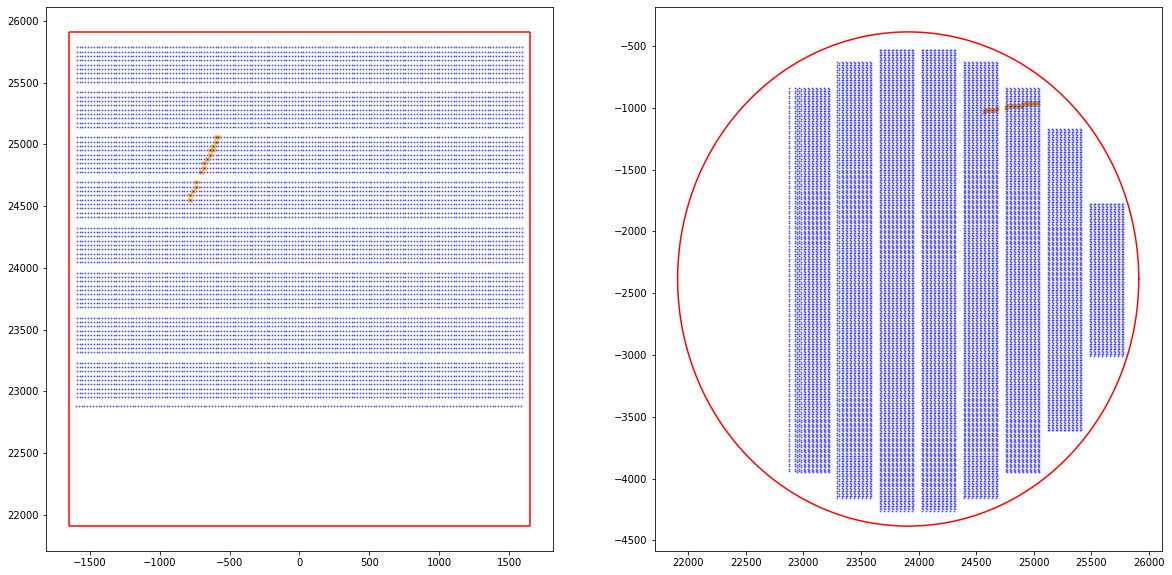

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

display1 = EventDisplay(arg_file_name = edep_file, 
                       arg_event_idx = 9,
                       fig = fig,
                       ax_0 = ax[0], 
                       ax_1 = ax[1],
                       arg_fired_wires_info = wires)

display1.plot_sand()
display1.plot_wires(color='orange', alpha=1)
display1.plot_wires_from_csv_table(all_wires)
# display1.plot_helix(helix_true, label = 'true helix', color = 'blue')
# display1.plot_helix(helix_reco, label = 'reco helix', color = 'green')

# u = initial_guess_circle.get_upper_semi_circle_points()
# l = initial_guess_circle.get_lower_semi_circle_points()
# ax[1].plot(u[0], u[1], label = 'upper', color = 'red')
# ax[1].plot(l[0], l[1], label = 'upper', color = 'green')
# display1.set_figure()

In [26]:
u

<bound method Circle.get_upper_semi_circle_points of <Circle.Circle object at 0x7f08649b3710>>

In [19]:
np.shape(fitted_line.get_points(x = np.linspace(-1300, -1100)))

(2, 50)

No handles with labels found to put in legend.


zoom on track start


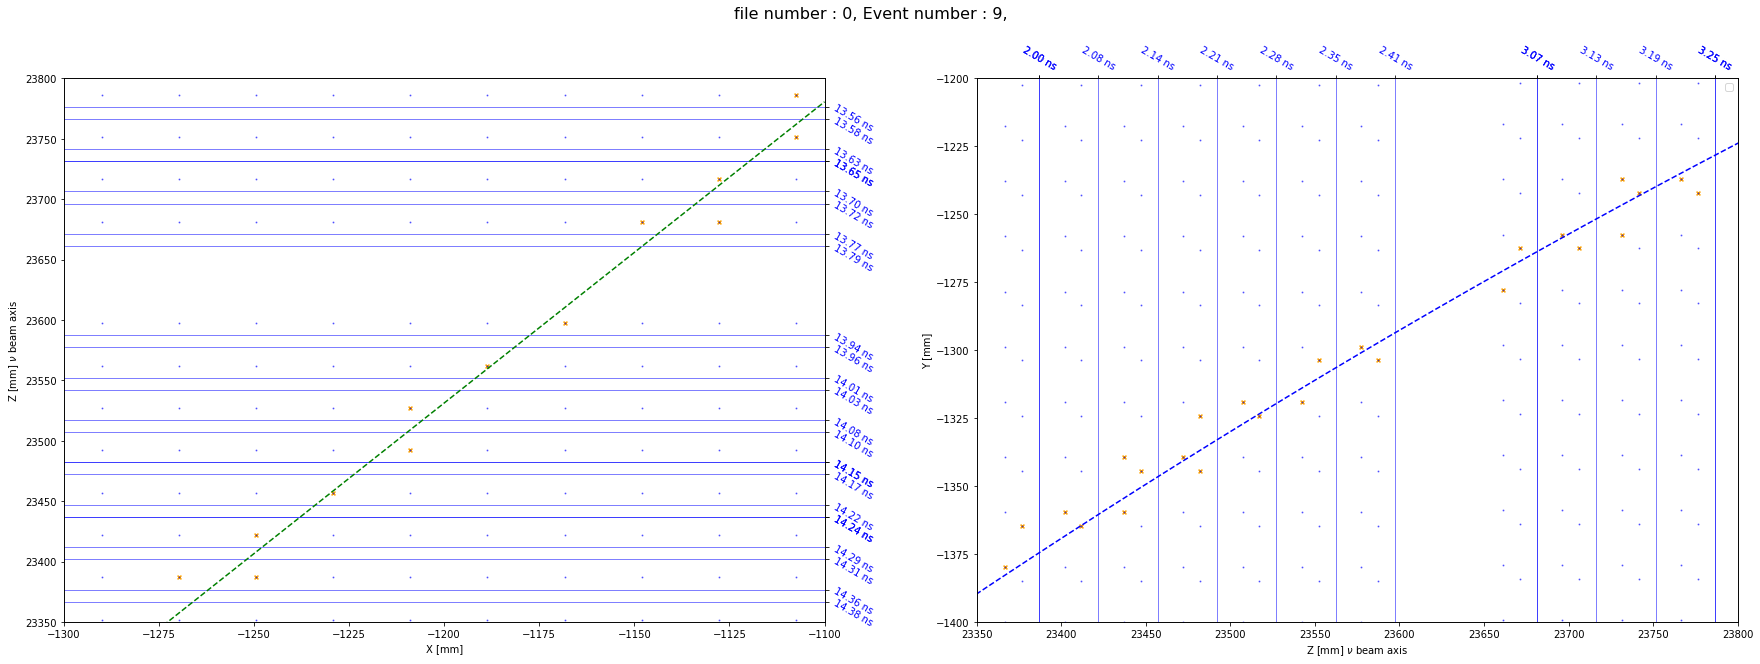

In [20]:
print(f"zoom on track start")

zoom_x = (-1300, -1100)
zoom_y = (-1400, -1200)
zoom_z = (23350, 23800)

fig, ax = plt.subplots(1, 2, figsize=(30, 10))

display3 = EventDisplay(arg_file_name = edep_file, 
                       arg_event_idx = 9,
                       fig = fig,
                       ax_0 = ax[0], 
                       ax_1 = ax[1],
                       arg_fired_wires_info = wires)

display3.set_zoom(zoom_x, zoom_y, zoom_z)

display3.plot_sand()
display3.plot_wires(plot_drift_circles=False,
                   plot_opposit_view=True,
                   color='orange',
                   alpha=1)
display3.plot_wires_from_csv_table(all_wires)
# display3.plot_line(line = fitted_line, label = 'fitted')
display3.plot_line(line = initial_guess_line, label = 'initial guess', color = 'green')
# display3.plot_circle(circle = fitted_circle, label = 'fitted')
display3.plot_circle(circle = initial_guess_circle, label = 'intial guess', color = 'green')
# display.plot_helix(helix_true, label = 'true helix', color = 'blue')
# display.plot_helix(helix_reco, label = 'reco helix', color = 'green')
display3.set_figure()

No handles with labels found to put in legend.


zoom on track end


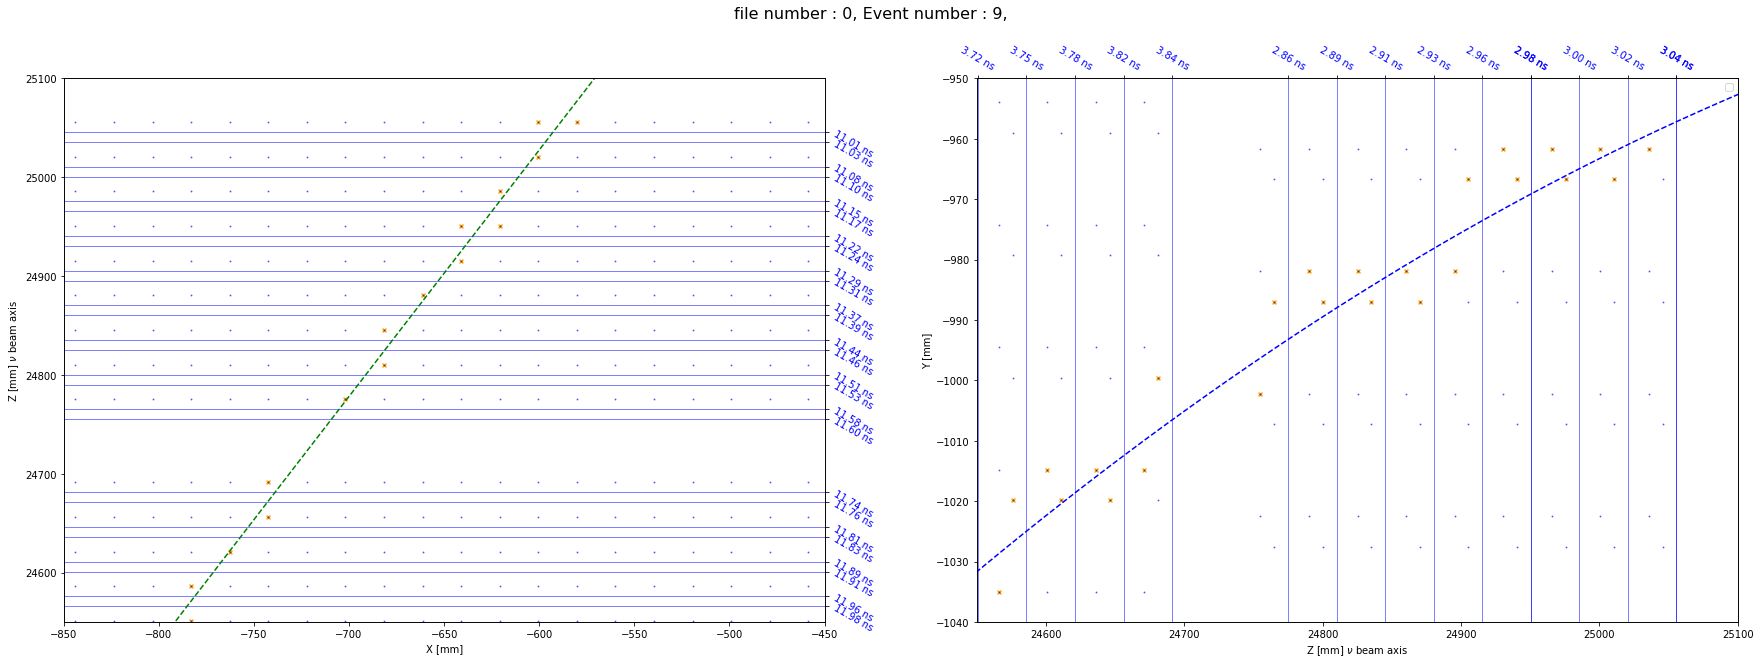

In [21]:
print('zoom on track end')

zoom_x = (-850, -450)
zoom_y = (-1040, -950)
zoom_z = (24550, 25100)

fig, ax = plt.subplots(1, 2, figsize=(30, 10))

display2 = EventDisplay(arg_file_name = edep_file, 
                       arg_event_idx = 9,
                       fig = fig,
                       ax_0 = ax[0], 
                       ax_1 = ax[1],
                       arg_fired_wires_info = wires)

display2.set_zoom(zoom_x, zoom_y, zoom_z)

display2.plot_sand()
display2.plot_wires(plot_drift_circles=False,
                   plot_opposit_view=True,
                   color='orange',
                   alpha=1)
display2.plot_wires_from_csv_table(all_wires)

# display2.plot_line(line = fitted_line, label = 'fitted')
# display2.plot_circle(circle = fitted_circle, label = 'fitted')

display2.plot_line(line = initial_guess_line, label = 'initial guess', color = 'green')
display2.plot_circle(circle = initial_guess_circle, label = 'intial guess', color = 'green')

# display.plot_helix(helix_true, label = 'true helix', color = 'blue')
# display.plot_helix(helix_reco, label = 'reco helix', color = 'green')
display2.set_figure()

In [24]:
np.shape(fitted_circle.get_upper_semi_circle_points())

(2, 5000)